# Question 5

This script determines the roots of a particular polynomial and produces a
pole-zero plot, then evaluates the magnitude of the polynomial around the unit
circle using the DFT.

In [23]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from matplotlib.lines import Line2D
from matplotlib.patches import Circle

from numpy.polynomial.polynomial import Polynomial, polyval

from config import A1_ROOT, PLT_CONFIG, SAVEFIG_CONFIG

In [24]:
# Define the polynomial
poly = Polynomial([1, 5, 3, 4, 4, 2, 1])

### Part A: Pole-zero plot

In [25]:
# Find the roots of the polynomial
poly_roots = poly.roots()
print("Polynomial roots:", poly_roots)

Polynomial roots: [-1.33198561+0.j         -0.62775824-1.564597j   -0.62775824+1.564597j
 -0.22269308+0.j          0.40509758-1.01099437j  0.40509758+1.01099437j]


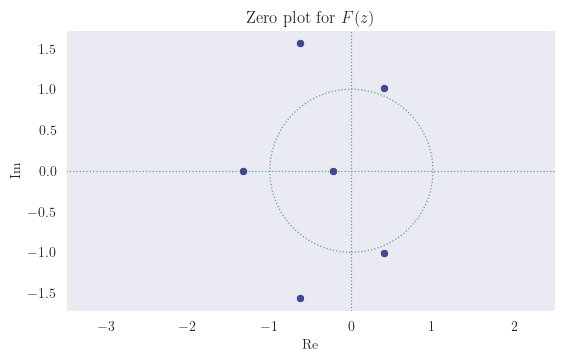

In [26]:
# Draw the pole-zero plot
sns.set_style("dark")           # override default style to hide grid
plt.rcParams.update(PLT_CONFIG) # re-set plot text customisation

fig, ax = plt.subplots(figsize=(6, 3.375))
fig.tight_layout()

# Plot the zeros
sns.scatterplot(x=np.real(poly_roots), y=np.imag(poly_roots), ax=ax, marker="o")
ax.set_xlim(-3.5, 2.5)

# Draw the unit circle as an underlay
underlay_style = {"ls": "dotted", "lw": 0.9, "color": "cadetblue", "zorder": 0}
unit_circle = Circle(xy=(0, 0), radius=1, fill=False, **underlay_style)
ax.add_patch(unit_circle)

# Draw the x and y axes as another underlay
x_axis = Line2D(xdata=ax.get_xlim(), ydata=(0, 0), **underlay_style)
y_axis = Line2D(xdata=(0, 0), ydata=ax.get_ylim(), **underlay_style)
ax.add_line(x_axis)
ax.add_line(y_axis)

ax.set_aspect("equal")

ax.set_title("Zero plot for $F(z)$")
ax.set_xlabel("Re")
ax.set_ylabel("Im")

fname = Path(A1_ROOT, "output", "q5a_polezero.png")
fig.savefig(fname, **SAVEFIG_CONFIG)

### Part B: DFT implementation

In [27]:
# Define an "own" DFT implementation to compare with scipy
def zdft(poly_coef: np.array, n: int) -> np.array:
    """
    Computes the 1D `n`-point discrete Fourier transform of some sequence from
    its Z transform, given by `poly_coef`.
    """
    return np.array(
        [polyval(np.exp(-1j*2*np.pi*k/n), poly_coef) for k in range(n)])

In [28]:
from scipy.fft import fft

# Evaluate the polynomial coefficients using scipy's and own DFT implementations
y_fft = np.abs(fft(poly.coef, n=128))
y_dft = np.abs(zdft(poly.coef, n=128))

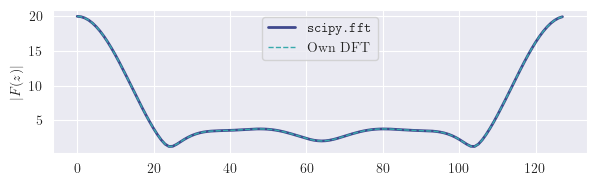

In [29]:
from config import SNS_STYLE

sns.set_style(SNS_STYLE)        # re-set the default style, changed by part (a)
plt.rcParams.update(PLT_CONFIG) # re-set the plot text customisation

# Plot the results of the two implementations together
fig, ax = plt.subplots(figsize=(6, 2))
fig.tight_layout()

sns.lineplot(x=np.arange(128), y=y_fft, ax=ax, ls="-", lw=2, 
    label=r"$\texttt{scipy.fft}$")
sns.lineplot(x=np.arange(128), y=y_dft, ax=ax, ls="--", lw=1,
    label="Own DFT")

ax.set_title("")
ax.set_xlabel("")
ax.set_ylabel("$|F(z)|$")

ax.legend(loc="upper center")

fname = Path(A1_ROOT, "output", "q5b_dftsample.png")
fig.savefig(fname, **SAVEFIG_CONFIG)